### Perform Linear Regression in a Data Frame using the Pandas library.


Import the required library:

In [37]:
import pandas as pd

Read the dataset:

In [38]:
sample_data = {
    'X': [4.5, 5.2, 6.0, 6.4, 7.1, 7.3, 8.0, 8.4, 9.1, 9.5,
          4.8, 5.5, 5.9, 6.6, 6.9, 7.5, 8.1, 8.6, 8.9, 9.3],
    'Y': [5.1, 6.3, 6.7, 7.5, 7.8, 8.1, 8.6, 9.0, 9.4, 9.8,
          5.4, 6.1, 6.5, 7.2, 7.6, 8.0, 8.3, 8.7, 9.1, 9.5]
}

df = pd.DataFrame(sample_data, columns=['X', 'Y'])

df

,X,Y
0,4.5,5.1
1,5.2,6.3
2,6.0,6.7
3,6.4,7.5
4,7.1,7.8
5,7.3,8.1
6,8.0,8.6
7,8.4,9.0
8,9.1,9.4
9,9.5,9.8


Find the total number of samples

In [39]:
n = len(df)
print(f"n = {n}")

n = 20


The sum of X values

In [40]:
sum_x = df['X'].sum()
print(f"Sum of X = {sum_x}")

Sum of X = 143.6


The sum of Y values

In [41]:
sum_y = df['Y'].sum()
print(f"Sum of Y = {sum_y}")

Sum of Y = 154.7


The sum of (X * Y) values

In [ ]:
sum_xy = (df['X'] * df['Y']).sum()
print(f"Sum of XY = {sum_xy}")

Sum of X^2 values

In [42]:
sum_x_pow = (df['X'] ** 2).sum()
print(f"Sum of X^2 = {sum_x_pow}")

Sum of X^2 = 1076.3600000000001


Sum of X powered by 2

In [43]:
sum_pow_x = (df['X'].sum()) ** 2
print(f"(Sum of X)^2 = {sum_pow_x}")

(Sum of X)^2 = 20620.96


Apply the Linear Regression formula:

In [44]:
B = ((n * sum_xy) - (sum_x * sum_y)) / ((n * sum_x_pow) - sum_pow_x)
A = (sum_y - (B * sum_x)) / n
print(f"Linear Regression: Y = {A} + {B}X")

Linear Regression: Y = 1.4151041666667006 + 0.8802083333333286X


Draw the Regression line:

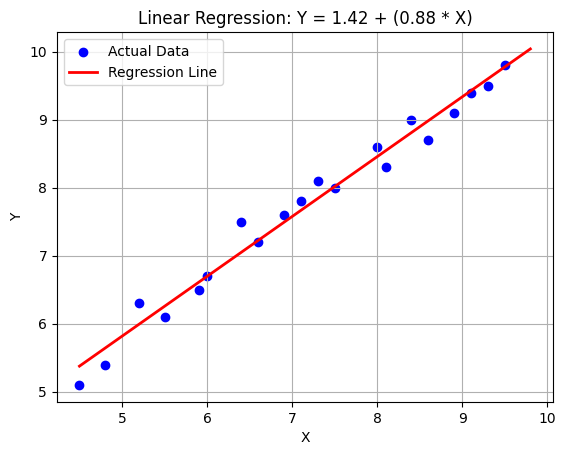

In [45]:
import matplotlib.pyplot as plt

# Draw Regression Line
# Scatter plot of actual data
plt.scatter(df['X'], df['Y'],
            color='blue', label='Actual Data')
# Regression line
X_range = [min(df['X']), max(df['Y'])]
y_range = [A + B * x for x in X_range]
plt.plot(X_range, y_range, color='red', linewidth=2, label='Regression Line')

# Labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title(f'Linear Regression: Y = {A:.2f} + ({B:.2f} * X)')
plt.legend()
plt.grid(True)
plt.show()

Make prediction for Y using X.

In [46]:
# Iterate over the data frame
pred_y = []
for i in range(len(df)):
    # Append the result to list
    pred_y.append(A + B * df['X'][i])

# Construct a new data frame
predict_data = {'Actual Y': df['Y'].tolist(), 'Predicted Y': pred_y}
pred_df = pd.DataFrame(predict_data)

pred_df

,Actual Y,Predicted Y
0,5.1,5.376042
1,6.3,5.992188
2,6.7,6.696354
3,7.5,7.048438
4,7.8,7.664583
5,8.1,7.840625
6,8.6,8.456771
7,9.0,8.808854
8,9.4,9.425000
9,9.8,9.777083


Add the Residual column

In [47]:
pred_df['Residual'] = abs(pred_df['Actual Y'] - pred_df['Predicted Y'])

pred_df

,Actual Y,Predicted Y,Residual
0,5.1,5.376042,0.276042
1,6.3,5.992188,0.307812
2,6.7,6.696354,0.003646
3,7.5,7.048438,0.451562
4,7.8,7.664583,0.135417
5,8.1,7.840625,0.259375
6,8.6,8.456771,0.143229
7,9.0,8.808854,0.191146
8,9.4,9.425000,0.025000
9,9.8,9.777083,0.022917


Sum of Squared Error and Mean Squared Error

In [49]:
print(f"Sum of Squared Error: {(pred_df['Residual'] ** 2).sum()}")
print(f"Mean Squared Error: {(pred_df['Residual'] ** 2).sum() / len(pred_df)}")

Sum of Squared Error: 0.7992708333333326
Mean Squared Error: 0.03996354166666663


R^2 Score

In [50]:
ss_res = (pred_df['Residual'] ** 2).sum()
ss_tot = abs((pred_df['Actual Y'] - pred_df['Actual Y'].mean()) ** 2).sum()
print(f"R^2 Score: {1 - (ss_res / ss_tot)}")

R^2 Score: 0.9777395988544002
